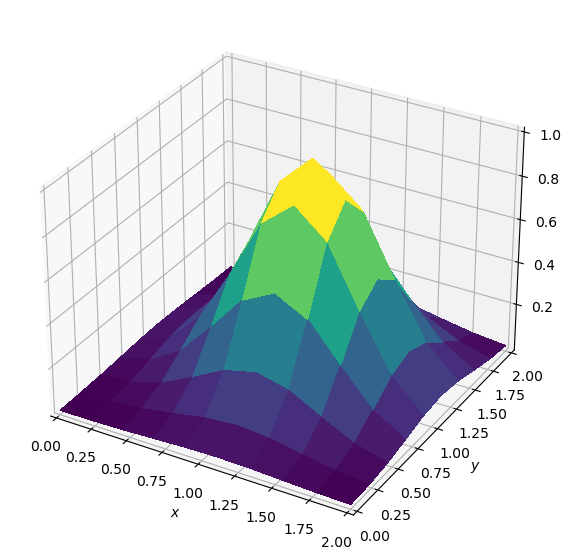

In [1]:
from examples.cfd import  plot_field
import numpy as np
from devito import *
from filter_generator import coupling_eq
def init_smooth(field, dx, dy):
    nx, ny = field.shape
    x = np.linspace(0, (nx-1)*dx, nx)
    y = np.linspace(0, (ny-1)*dy, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    # 使用高斯分布初始化平滑场
    sigma = 0.2
    field[:] = np.exp(-((X-nx*dx/2)**2 + (Y-ny*dy/2)**2) / (2*sigma**2))
    
nt = 100  # Number of timesteps
dt = 0.01  # Timestep size (sigma=0.2)
c = 1  # Value for c
nx = 10
ny = 10
length = 1
dx = length/nx
dy = length/ny
# Then we create a grid and our function
grid = Grid(shape=(nx, ny), extent=(length,length))
u = TimeFunction(name='u', grid=grid,time_order = 2, space_order = 2)
v = TimeFunction(name='v', grid=grid,time_order = 2, space_order = 2)

init_smooth(field=u.data[0], dx=grid.spacing[0], dy=grid.spacing[1])
init_smooth(field=v.data[0], dx=grid.spacing[0], dy=grid.spacing[1])

plot_field(v.data[0])

In [2]:
dx

0.1

In [3]:
eq1 = Eq(u.dt + c*u.dx + c*u.dy + u - v)
eq2 = Eq(v.dt + c*v.dx + c*v.dy + v - u)

In [4]:
f'{v.dx}' in str(eq2)

True

In [5]:
eq2

Eq(-u(t, x, y) + v(t, x, y) + Derivative(v(t, x, y), x) + Derivative(v(t, x, y), y) + Derivative(v(t, x, y), t), 0)

In [6]:
solve(eq2,v).subs({v.dx: 1})

(u(t, x, y) - Derivative(v(t, x, y), y) - 1 - v(t + dt, x, y)/dt)/(1 - 1/dt)

In [7]:
v.dt

Derivative(v(t, x, y), t)

In [8]:
eq1

Eq(u(t, x, y) - v(t, x, y) + Derivative(u(t, x, y), x) + Derivative(u(t, x, y), y) + Derivative(u(t, x, y), t), 0)

In [9]:
eq2.subs(v,v.forward).subs(v.forward.dt, v.dt)

Eq(-u(t, x, y) + v(t + dt, x, y) + Derivative(v(t, x, y), t) + Derivative(v(t + dt, x, y), x) + Derivative(v(t + dt, x, y), y), 0)

In [10]:
eq = [eq1,eq2]

In [11]:
a = coupling_eq(eq,[u,v],dt,dx,dy)

In [12]:
a

array([[[[ 0.  ,  0.  ,  0.  ],
         [-0.1 ,  1.21,  0.  ],
         [ 0.  , -0.1 ,  0.  ]],

        [[ 0.  ,  0.  ,  0.  ],
         [ 0.  , -0.01,  0.  ],
         [ 0.  ,  0.  ,  0.  ]]],


       [[[ 0.  ,  0.  ,  0.  ],
         [ 0.  , -0.01,  0.  ],
         [ 0.  ,  0.  ,  0.  ]],

        [[ 0.  ,  0.  ,  0.  ],
         [-0.1 ,  1.21,  0.  ],
         [ 0.  , -0.1 ,  0.  ]]]])

In [13]:
solve(eq1, u)

(v(t, x, y) - Derivative(u(t, x, y), x) - Derivative(u(t, x, y), y) - u(t + dt, x, y)/dt)/(1 - 1/dt)

In [14]:
b = a.simplify()

AttributeError: 'numpy.ndarray' object has no attribute 'simplify'

In [ ]:
type(eq1)